In [1]:
from preProcess import preProcess
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter
from testResults import testResults
from decisionTree import decisionTree
import numpy as np
import operator
from randomForest import randomForest
from knn import knn
from decisionTree import decisionTree

In [2]:
preProcessData = preProcess()
preProcessData.handle_missing_values()
preProcessData.handle_highly_correlated_features()
df = preProcessData.return_df()
df

Changed  16  missing values to -1
----------------------------------------------
uniformity_cell_shape is dropped
----------------------------------------------


,clump_thickness,uniformity_cell_size,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,2,1,3,1,1,2
1,5,4,5,7,10,3,2,1,2
2,3,1,1,2,2,3,1,1,2
3,6,8,1,3,4,3,7,1,2
4,4,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...
694,3,1,1,3,2,1,1,1,2
695,2,1,1,2,1,1,1,1,2
696,5,10,3,7,3,8,10,2,4
697,4,8,4,3,4,10,6,1,4


In [3]:
# Plot of optimum number of trees for Random Forest
c = 35
accs_full = []
accs_sqrt = []
accs_log2 = []
counts = range(1,c)
for i in range(1,c):
    print("FOR N = ", i)
    RF_full = randomForest(n_features='full', n_trees=i)
    RF_sqrt = randomForest(n_features='sqrt', n_trees=i)
    RF_log2 = randomForest(n_features='log2', n_trees=i)
    
    avg_acc_full = 0
    avg_f_score_full = 0
    avg_acc_sqrt = 0
    avg_f_score_sqrt = 0
    avg_acc_log2 = 0
    avg_f_score_log2 = 0
    
    kFold = KFold(6, True, 1)
    values = df.values
    for train, test in kFold.split(values):
        train_x = values[train]
        test_x, test_y = values[test][:,:-1], values[test][:,-1]
        
        RF_full.fit(train_x)
        RF_sqrt.fit(train_x)
        RF_log2.fit(train_x)

        pred_y_full = RF_full.predict(test_x)
        pred_y_sqrt = RF_sqrt.predict(test_x)
        pred_y_log2 = RF_log2.predict(test_x)

        results_full = testResults(pred_y_full, test_y)
        results_sqrt = testResults(pred_y_sqrt, test_y)
        results_log2 = testResults(pred_y_log2, test_y)

        avg_acc_full += results_full.return_accuracy()
        avg_f_score_full += results_full.return_fscore()
        avg_acc_sqrt += results_sqrt.return_accuracy()
        avg_f_score_sqrt += results_sqrt.return_fscore()
        avg_acc_log2 += results_log2.return_accuracy()
        avg_f_score_log2 += results_log2.return_fscore()

    print("Average accuracy for full = ", str(avg_acc_full/6.0))
    print("Average F score for full = ", str(avg_f_score_full/6.0))
    print("\n\n")
    print("Average accuracy for sqrt = ", str(avg_acc_sqrt/6.0))
    print("Average F score for sqrt = ", str(avg_f_score_sqrt/6.0))
    print("\n\n")
    print("Average accuracy for log2 = ", str(avg_acc_log2/6.0))
    print("Average F score for log2 = ", str(avg_f_score_log2/6.0))
    print("\n\n")
    
    accs_full.append(avg_acc_full/6.0)
    accs_sqrt.append(avg_acc_sqrt/6.0)
    accs_log2.append(avg_acc_log2/6.0)

    del RF_full
    del RF_log2
    del RF_sqrt

FOR N =  1
Average accuracy for full =  0.8940834070144414
Average F score for full =  0.8354334273321614



Average accuracy for sqrt =  0.8380489242558209
Average F score for sqrt =  0.7846911367091636



Average accuracy for log2 =  0.8011715296198055
Average F score for log2 =  0.7290261957793462



FOR N =  2
Average accuracy for full =  0.8911975636113567
Average F score for full =  0.8176013334625502



Average accuracy for sqrt =  0.8354332449160036
Average F score for sqrt =  0.7013478124969544



Average accuracy for log2 =  0.8469643383436486
Average F score for log2 =  0.7003716096323145



FOR N =  3
Average accuracy for full =  0.9255083996463308
Average F score for full =  0.8857342501318404



Average accuracy for sqrt =  0.8267388741526672
Average F score for sqrt =  0.7788046284251218



Average accuracy for log2 =  0.8611479516651931
Average F score for log2 =  0.7968808448337484



FOR N =  4
Average accuracy for full =  0.9083652618135377
Average F score for full =

Average accuracy for full =  0.9212348953728263
Average F score for full =  0.8795707977935853



Average accuracy for sqrt =  0.8885082031633754
Average F score for sqrt =  0.8447244617976325



Average accuracy for log2 =  0.9270679831024659
Average F score for log2 =  0.8924079468312153



FOR N =  29
Average accuracy for full =  0.9255452402004126
Average F score for full =  0.8881984356391349



Average accuracy for sqrt =  0.8541973671284016
Average F score for sqrt =  0.8109601735827447



Average accuracy for log2 =  0.9155737302289028
Average F score for log2 =  0.8783661918152509



FOR N =  30
Average accuracy for full =  0.9284188034188033
Average F score for full =  0.891639822013694



Average accuracy for sqrt =  0.8639478337754198
Average F score for sqrt =  0.8147928559514853



Average accuracy for log2 =  0.9270679831024659
Average F score for log2 =  0.8913502056454989



FOR N =  31
Average accuracy for full =  0.934153649670891
Average F score for full =  0.901572

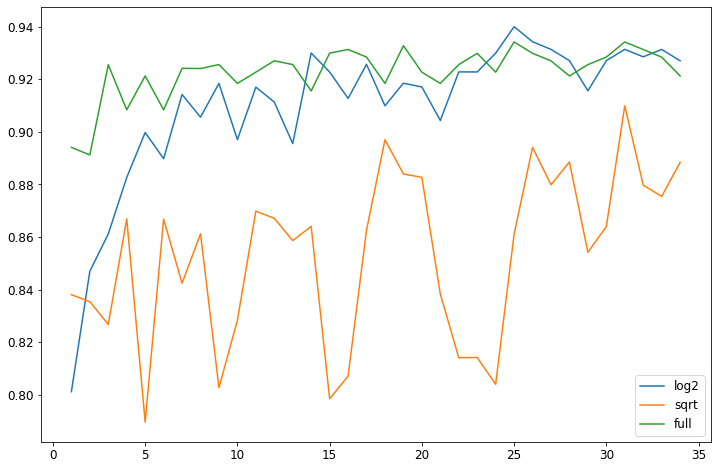

In [4]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 12})
fig = plt.figure()
plt.plot(counts, accs_log2, label='log2')
plt.plot(counts, accs_sqrt, label='sqrt')
plt.plot(counts, accs_full, label='full')
plt.legend()
plt.show()